In [4]:
from onset.similarity import calc_accuracy_as_dataframe
from onset.utilities.graph_utils import read_json_graph
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
G_path = "/home/matt/src/topology-programming/data/graphs/json/campus/campus_ground_truth.json"
H_path = "/home/matt/src/topology-programming/data/graphs/json/campus/campus_reconstruction.json"

In [87]:
G = read_json_graph(G_path, stringify=True)
H = read_json_graph(H_path, stringify=True)

In [48]:
acc_df = calc_accuracy_as_dataframe(G, H)
betweenness_similarity["% error"] = (abs((betweenness_similarity["H betweenness"] - betweenness_similarity["G betweenness"]) / betweenness_similarity["G betweenness"]))
betweenness_similarity.replace(np.inf, 100)

In [100]:
X = [x for x in acc_df['level_0']]
Y = [y for y in acc_df['level_1']]
edge = [(x, y) for (x, y) in zip(X, Y)]
acc_df["edge"] = edge
acc_df["% error"] = (abs((acc_df["H betweenness"] - acc_df["G betweenness"]) / acc_df["G betweenness"])) / 100
acc_df.replace(np.inf, 1, inplace=True)
acc_df.fillna(0, inplace=True)
holy_simularity = acc_df[["edge", "G betweenness", "H betweenness", "overlap coefficient", "overlap weighted", "Jaccard similarity", "Jaccard weighted", "% error"]]

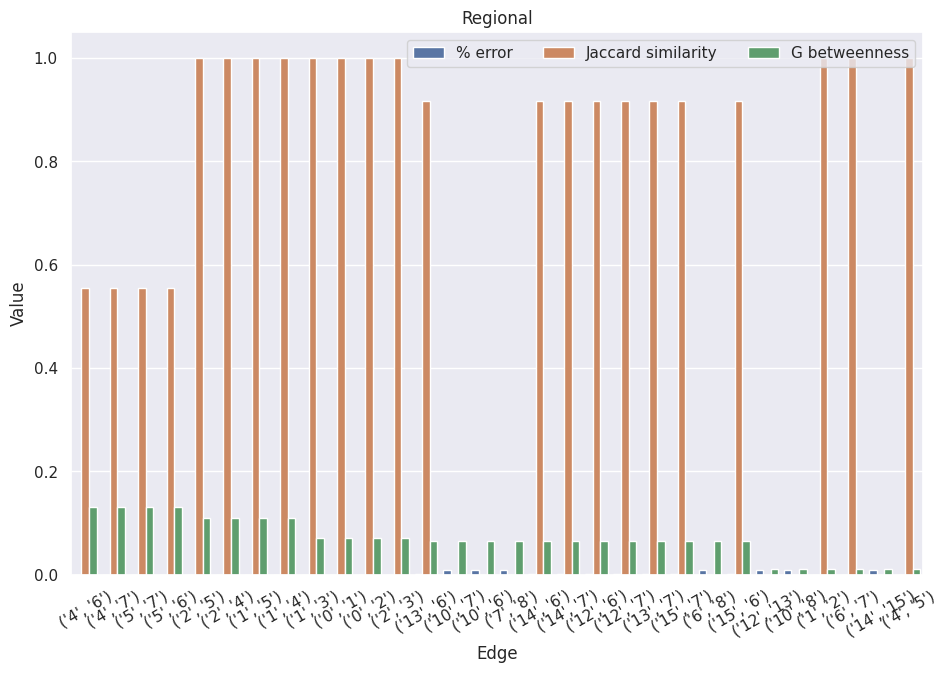

In [103]:
vars = ["edge", "% error", "Jaccard similarity", "G betweenness"]
anchor_var = "G betweenness"
similarity = holy_simularity[vars]
similarity = similarity.sort_values(anchor_var, ascending=False)
similarity = similarity[similarity["G betweenness"] > 0]
similarity = similarity[similarity["% error"] < 1]
similarity = similarity.melt(id_vars='edge').rename(columns=str.title)
similarity


sns.set(rc={'figure.figsize':(11.7*0.8,8.27*0.8)})
sns.barplot(similarity, x='Edge', y='Value', hue='Variable')
plt.xticks(rotation=30)
plt.legend(ncol=3, title="")
plt.title("Regional")
plt.show()

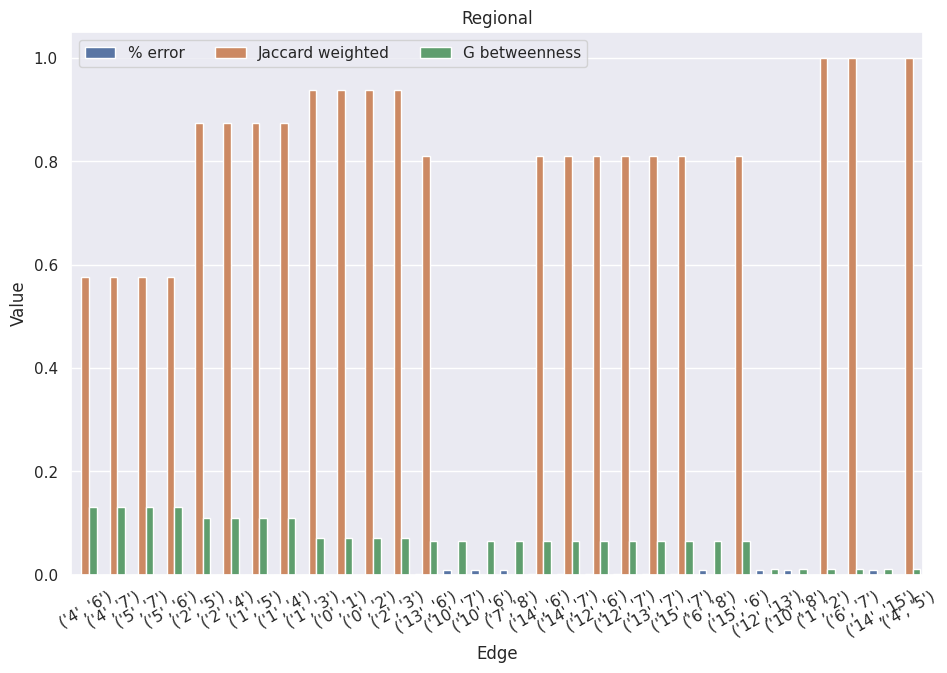

In [104]:
vars = ["edge", "% error", "Jaccard weighted", "G betweenness"]
anchor_var = "G betweenness"
similarity = holy_simularity[vars]
similarity = similarity.sort_values(anchor_var, ascending=False)
similarity = similarity[similarity["G betweenness"] > 0]
similarity = similarity[similarity["% error"] < 1]
similarity = similarity.melt(id_vars='edge').rename(columns=str.title)
similarity


sns.set(rc={'figure.figsize':(11.7*0.8,8.27*0.8)})
sns.barplot(similarity, x='Edge', y='Value', hue='Variable')
plt.xticks(rotation=30)
plt.legend(ncol=3, title="")
plt.title("Regional")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, "('13', '7')"),
  Text(1, 0, "('5', '7')"),
  Text(2, 0, "('0', '1')"),
  Text(3, 0, "('2', '3')"),
  Text(4, 0, "('2', '5')"),
  Text(5, 0, "('6', '7')"),
  Text(6, 0, "('1', '4')"),
  Text(7, 0, "('4', '6')"),
  Text(8, 0, "('10', '8')"),
  Text(9, 0, "('4', '7')"),
  Text(10, 0, "('15', '6')"),
  Text(11, 0, "('0', '2')"),
  Text(12, 0, "('6', '8')"),
  Text(13, 0, "('15', '7')"),
  Text(14, 0, "('1', '5')"),
  Text(15, 0, "('2', '4')"),
  Text(16, 0, "('5', '6')"),
  Text(17, 0, "('10', '6')"),
  Text(18, 0, "('14', '6')"),
  Text(19, 0, "('7', '8')"),
  Text(20, 0, "('12', '13')"),
  Text(21, 0, "('10', '7')"),
  Text(22, 0, "('1', '3')"),
  Text(23, 0, "('14', '7')"),
  Text(24, 0, "('12', '6')"),
  Text(25, 0, "('12', '7')"),
  Text(26, 0, "('1', '2')"),
  Text(27, 0, "('13', '6')"),
  Text(28, 0, "('14', '15')"),
  Text(29, 0, "(

/home/matt/src/topology-programming/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


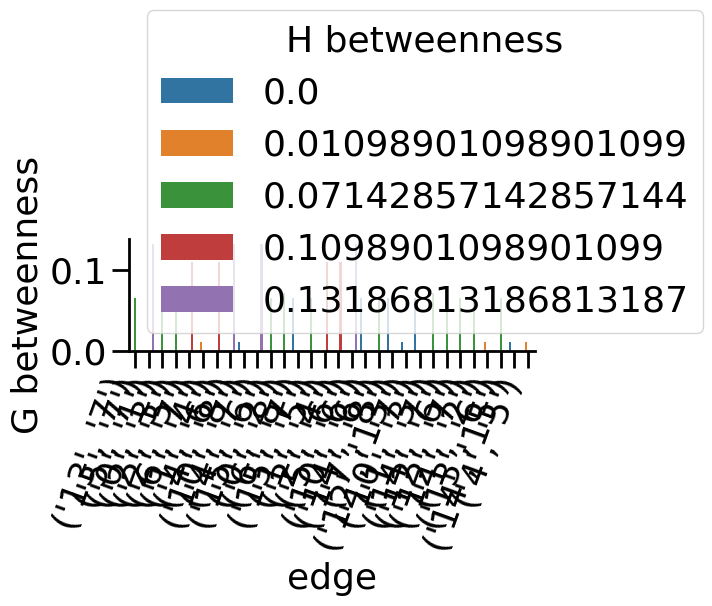

In [13]:
this_series = acc_df[acc_df["G betweenness"] > 0]
sns.barplot(acc_df[acc_df["G betweenness"] > 0], x=this_series["edge"], y=this_series["G betweenness"], hue=this_series["H betweenness"])
plt.xticks(rotation=70, horizontalalignment='right')

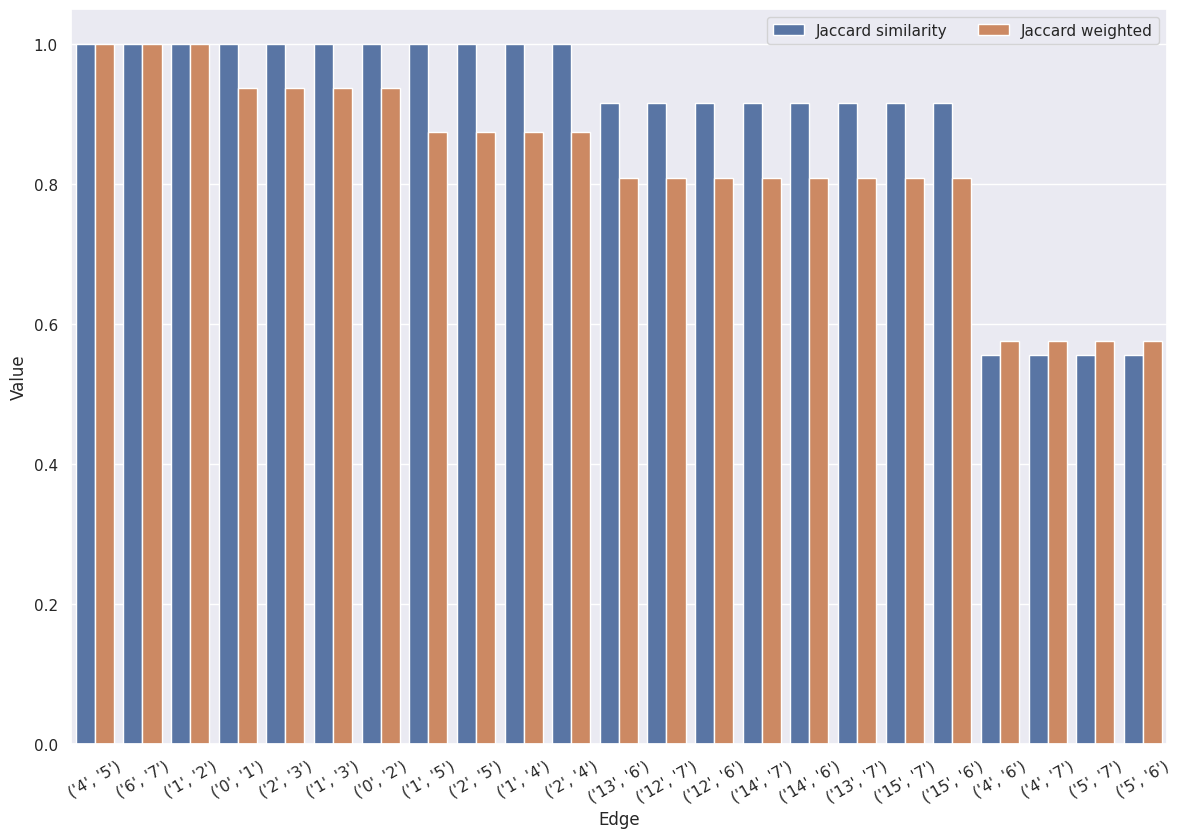

In [14]:
tidy = acc_df.melt(id_vars='edge').rename(columns=str.title)
jacard_similarity = acc_df[["edge", "Jaccard similarity", "Jaccard weighted"]]
jacard_similarity = jacard_similarity.sort_values("Jaccard weighted", ascending=False)
jacard_similarity = jacard_similarity[jacard_similarity["Jaccard weighted"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
tidy_jac = jacard_similarity.melt(id_vars='edge').rename(columns=str.title)
tidy_jac
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(tidy_jac, x='Edge', y='Value', hue='Variable')
plt.xticks(rotation=30)
plt.legend(ncol=2, title="")

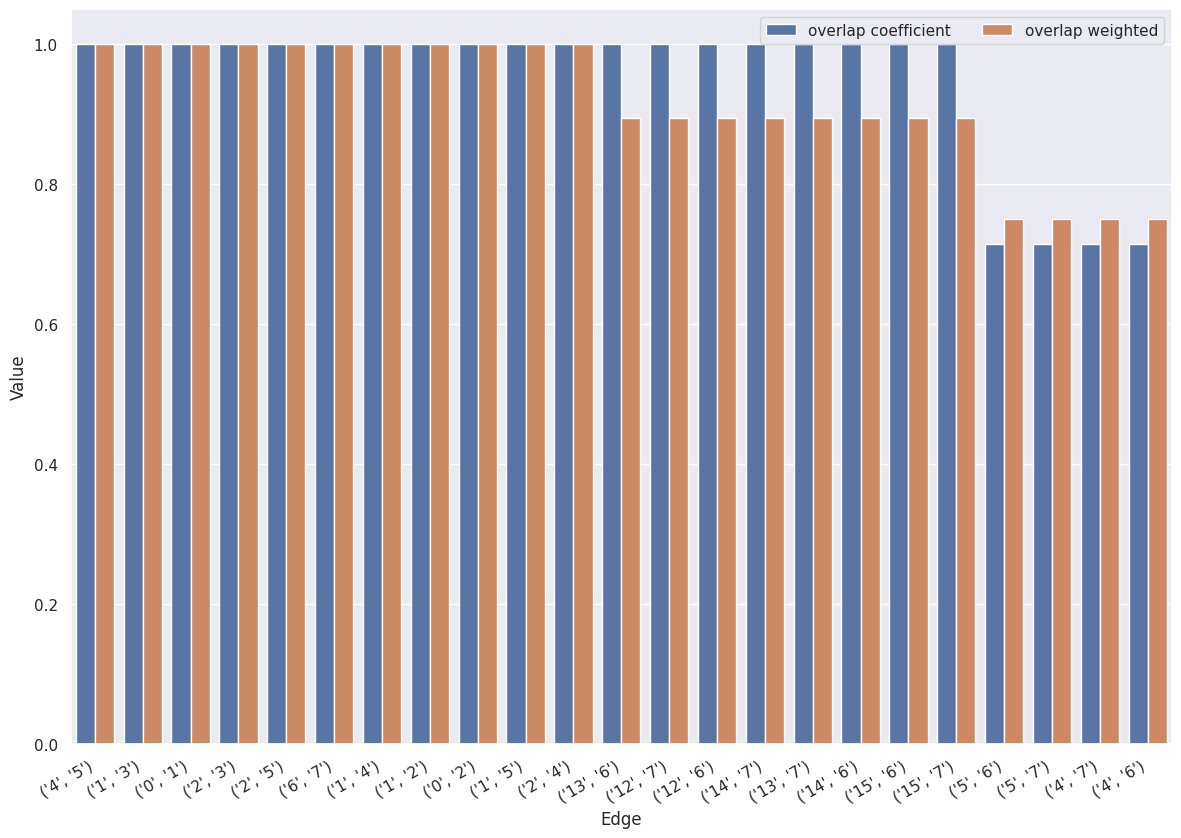

In [15]:
tidy = acc_df.melt(id_vars='edge').rename(columns=str.title)
overlap_similarity = acc_df[["edge", "overlap coefficient", "overlap weighted"]]
overlap_similarity = overlap_similarity.sort_values("overlap weighted", ascending=False)
overlap_similarity = overlap_similarity[overlap_similarity["overlap weighted"] > 0]
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
tidy_overlap = overlap_similarity.melt(id_vars='edge').rename(columns=str.title)
tidy_overlap
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(tidy_overlap, x='Edge', y='Value', hue='Variable')
plt.xticks(rotation=30, horizontalalignment='right')
plt.legend(ncol=2, title="")

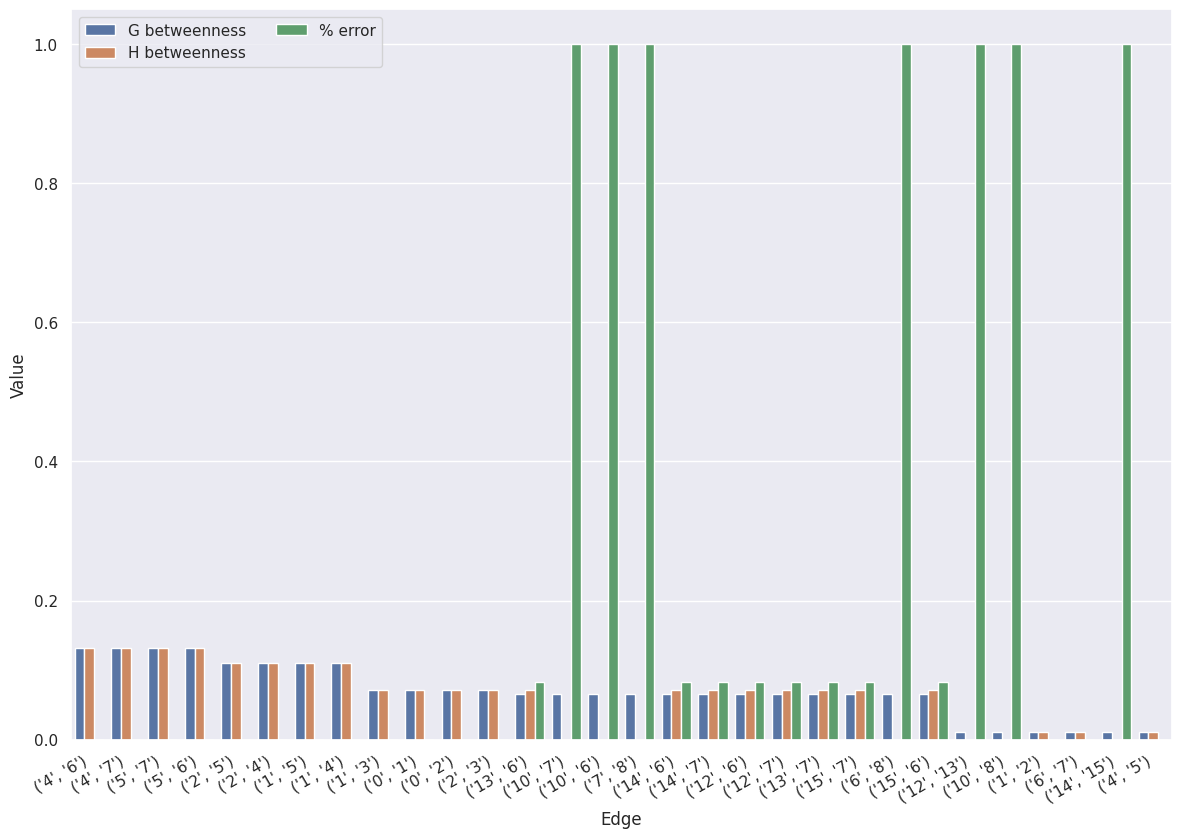

In [44]:
tidy = acc_df.melt(id_vars='edge').rename(columns=str.title)
betweenness_similarity = acc_df[["edge", "G betweenness", "H betweenness"]]
betweenness_similarity = betweenness_similarity.sort_values("G betweenness", ascending=False)
betweenness_similarity = betweenness_similarity[betweenness_similarity["G betweenness"] > 0]
betweenness_similarity["% error"] = (abs((betweenness_similarity["H betweenness"] - betweenness_similarity["G betweenness"]) / betweenness_similarity["G betweenness"]))
betweenness_similarity.replace(np.inf, 100)
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity.columnsj
# tidy_jac = df.melt(id_vars='edge').rename(columns=str.title)
# jacard_similarity = jacard_similarity.reset_index()
tidy_betweenness = betweenness_similarity.melt(id_vars='edge').rename(columns=str.title)
tidy_betweenness
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(tidy_betweenness, x='Edge', y='Value', hue='Variable')
plt.xticks(rotation=30, horizontalalignment='right')
plt.legend(ncol=2, title="")

In [17]:
acc_df.columns

Index(['level_0', 'level_1', 'G flows', 'num G flows', 'H flows',
       'num H flows', 'union', 'size union', 'intersection',
       'size intersection', 'G betweenness', 'H betweenness',
       'Jaccard similarity', 'overlap coefficient', 'G flow_weights',
       'H flow weights', 'sum G flow_weights', 'sum H flow_weights',
       'Jaccard weighted', 'overlap weighted', 'edge'],
      dtype='object')

In [24]:
acc_df[acc_df["edge"] == ("13", "6")]['sum H flow_weights']


31    4.75
Name: sum H flow_weights, dtype: float64

In [23]:
acc_df[acc_df["edge"] == ("13", "6")]['sum G flow_weights']

31    4.75
Name: sum G flow_weights, dtype: float64

In [25]:
betweenness_similarity = acc_df[["edge", "G betweenness", "H betweenness"]]

0       8.333333
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6            inf
7            inf
8       0.000000
9            inf
10      0.000000
11    100.000000
12      0.000000
13      8.333333
14      0.000000
15           inf
16    100.000000
17      8.333333
18      0.000000
19      0.000000
20      0.000000
21    100.000000
22      8.333333
23    100.000000
24    100.000000
25    100.000000
26      0.000000
27      8.333333
28      8.333333
29      8.333333
30      0.000000
31      8.333333
32    100.000000
33      0.000000
dtype: float64

,edge,G betweenness,H betweenness,% error
0,"(13, 7)",0.065934,0.071429,8.333333
1,"(5, 7)",0.131868,0.131868,0.000000
2,"(0, 1)",0.071429,0.071429,0.000000
3,"(2, 3)",0.071429,0.071429,0.000000
4,"(2, 5)",0.109890,0.109890,0.000000
5,"(6, 7)",0.010989,0.010989,0.000000
6,"(10, 4)",0.000000,0.071429,100.000000
7,"(5, 8)",0.000000,0.071429,100.000000
8,"(1, 4)",0.109890,0.109890,0.000000
9,"(10, 5)",0.000000,0.071429,100.000000


In [36]:
pd.inf

AttributeError: module 'pandas' has no attribute 'inf'

In [37]:
import numpy as np